<a href="https://colab.research.google.com/github/Uchiha-Ihor/Machine_learning/blob/master/%D0%93%D1%80%D0%B8%D1%89%D1%83%D0%BA_%D0%BB%D0%B14_%D0%B2%D0%B0%D1%807.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ПРАКТИЧНА РОБОТА 4

---


Вступ до машинного навчання. Елементи лінійної алгебри.
>
Варіант №7
>
Мій githab:https://github.com/Uchiha-Ihor/Machine_learning

Завдання 1:Завантажте файл Housing.csv. Виведіть перші 5 рядків.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
import pandas as pd

df = pd.read_csv('Housing.csv')

print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Завдання 2: Зробіть новий датасет, який містить тільки ці стовпчики.
columns = ['price', 'area', 'bedrooms', 'bathrooms']


In [4]:
import pandas as pd

df = pd.read_csv('Housing.csv')

selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

print(selected_columns.head())

selected_columns.to_csv('selected_housing.csv', index=False)


      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
4  11410000  7420         4          1


Завдання 3: Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.
Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком.




In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('Housing.csv')

selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

print("Загальна інформація про датасет:")
print(selected_columns.info())

selected_columns = selected_columns.replace('-', np.nan)

selected_columns = selected_columns.astype(float)

selected_columns = selected_columns.fillna(selected_columns.mean())

print("\nПерші 5 рядків обробленого датасету:")
print(selected_columns.head())

selected_columns.to_csv('processed_housing.csv', index=False)

Загальна інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None

Перші 5 рядків обробленого датасету:
        price    area  bedrooms  bathrooms
0  13300000.0  7420.0       4.0        2.0
1  12250000.0  8960.0       4.0        4.0
2  12250000.0  9960.0       3.0        2.0
3  12215000.0  7500.0       4.0        2.0
4  11410000.0  7420.0       4.0        1.0


Завдання 4: Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1.
Примітка. Для нормалізації можна використовувати стандартні функції або написати самостійно.



In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Housing.csv')

selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

print("Загальна інформація про датасет:")
print(selected_columns.info())

selected_columns = selected_columns.replace('-', float('nan'))

selected_columns = selected_columns.astype(float)

selected_columns = selected_columns.fillna(selected_columns.mean())

scaler = StandardScaler()

normalized_data = scaler.fit_transform(selected_columns)

normalized_df = pd.DataFrame(normalized_data, columns=selected_columns.columns)

print("\nПерші 5 рядків нормалізованого датасету:")
print(normalized_df.head())

Загальна інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None

Перші 5 рядків нормалізованого датасету:
      price      area  bedrooms  bathrooms
0  4.566365  1.046726  1.403419   1.421812
1  4.004484  1.757010  1.403419   5.405809
2  4.004484  2.218232  0.047278   1.421812
3  3.985755  1.083624  1.403419   1.421812
4  3.554979  1.046726  1.403419  -0.570187


Завдання 5: Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('Housing.csv')

selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

selected_columns = selected_columns.replace('-', float('nan'))

selected_columns = selected_columns.astype(float)

selected_columns = selected_columns.fillna(selected_columns.mean())

scaler = StandardScaler()

normalized_data = scaler.fit_transform(selected_columns)

normalized_df = pd.DataFrame(normalized_data, columns=selected_columns.columns)

X = normalized_df.drop('price', axis=1)
y = normalized_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розміри навчального набору (X_train, y_train):", X_train.shape, y_train.shape)
print("Розміри тестового набору (X_test, y_test):", X_test.shape, y_test.shape)

Розміри навчального набору (X_train, y_train): (436, 3) (436,)
Розміри тестового набору (X_test, y_test): (109, 3) (109,)


Завдання 6: Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('Housing.csv')

selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

selected_columns = selected_columns.replace('-', float('nan'))

selected_columns = selected_columns.astype(float)

selected_columns = selected_columns.fillna(selected_columns.mean())

scaler = StandardScaler()

normalized_data = scaler.fit_transform(selected_columns)

normalized_df = pd.DataFrame(normalized_data, columns=selected_columns.columns)

features = normalized_df[['area', 'bathrooms', 'bedrooms']]
target = normalized_df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Розміри навчального набору (X_train, y_train):", X_train.shape, y_train.shape)
print("Розміри тестового набору (X_test, y_test):", X_test.shape, y_test.shape)

Розміри навчального набору (X_train, y_train): (436, 3) (436,)
Розміри тестового набору (X_test, y_test): (109, 3) (109,)


Завдання 7: Побудуйте модель лінійної регресії та навчіть її на навчальних даних.



In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Housing.csv')

selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

selected_columns = selected_columns.replace('-', float('nan'))

selected_columns = selected_columns.astype(float)

selected_columns = selected_columns.fillna(selected_columns.mean())

scaler = StandardScaler()

normalized_data = scaler.fit_transform(selected_columns)

normalized_df = pd.DataFrame(normalized_data, columns=selected_columns.columns)

features = normalized_df[['area', 'bathrooms', 'bedrooms']]
target = normalized_df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
print("Оцінка моделі на навчальних даних:", train_score)

Оцінка моделі на навчальних даних: 0.4938250491003572


Завдання 8: Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R^2).
Потім застосуйте  крос-валідацію для підвищення якості моделі. Порівняйте результати (без крос-валідації і з крос-валідацією).


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Housing.csv')

selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

selected_columns = selected_columns.replace('-', float('nan'))

selected_columns = selected_columns.astype(float)

selected_columns = selected_columns.fillna(selected_columns.mean())

scaler = StandardScaler()

normalized_data = scaler.fit_transform(selected_columns)

normalized_df = pd.DataFrame(normalized_data, columns=selected_columns.columns)

features = normalized_df[['area', 'bathrooms', 'bedrooms']]
target = normalized_df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_r2 = r2_score(y_test, y_pred)
print("Середньоквадратична помилка (RMSE) на тестових даних:", test_rmse)
print("Коефіцієнт детермінації (R^2) на тестових даних:", test_r2)

cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
cv_r2_scores = cross_val_score(model, features, target, cv=5, scoring='r2')

print("\nСереднє значення RMSE під час крос-валідації:", cv_rmse_scores.mean())
print("Середнє значення R^2 під час крос-валідації:", cv_r2_scores.mean())

Середньоквадратична помилка (RMSE) на тестових даних: 0.8874106823867897
Коефіцієнт детермінації (R^2) на тестових даних: 0.4559299118872445

Середнє значення RMSE під час крос-валідації: 0.8412833163569633
Середнє значення R^2 під час крос-валідації: -13.98915818011169


Завдання 9: Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Зчитайте початковий датасет
df = pd.read_csv('Housing.csv')

# Виберіть лише вказані стовпці
selected_columns = df[['price', 'area', 'bedrooms', 'bathrooms']]

selected_columns = selected_columns.replace('-', float('nan'))

selected_columns = selected_columns.astype(float)

selected_columns = selected_columns.fillna(selected_columns.mean())

scaler = StandardScaler()

normalized_data = scaler.fit_transform(selected_columns)

normalized_df = pd.DataFrame(normalized_data, columns=selected_columns.columns)

features = normalized_df[['area', 'bathrooms', 'bedrooms']]
target = normalized_df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_test})

print(predictions_df.head(10))

     Actual Price  Predicted Price
316     -0.378188         0.864997
77       1.007785         0.783166
360     -0.565482        -0.625477
90       0.895409        -0.255254
493     -1.052446        -0.447516
209      0.071316         0.062719
176      0.258610         0.395481
249     -0.119723         0.696767
516     -1.239739        -0.773372
426     -0.756522        -0.680450


ЧАСТИНА 2

Завдання 1: Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

In [17]:
import numpy as np

X_with_bias = np.column_stack((np.ones(len(X_train)), X_train))

y_train_vector = y_train.values.reshape(-1, 1)

theta = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y_train_vector)

print("Коефіцієнти лінійної регресії (ваги моделі):")
print(theta)

Коефіцієнти лінійної регресії (ваги моделі):
[[-0.01628175]
 [ 0.40082084]
 [ 0.38208794]
 [ 0.14213176]]


ЧАСТИНА 3

Завдання 1: Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.

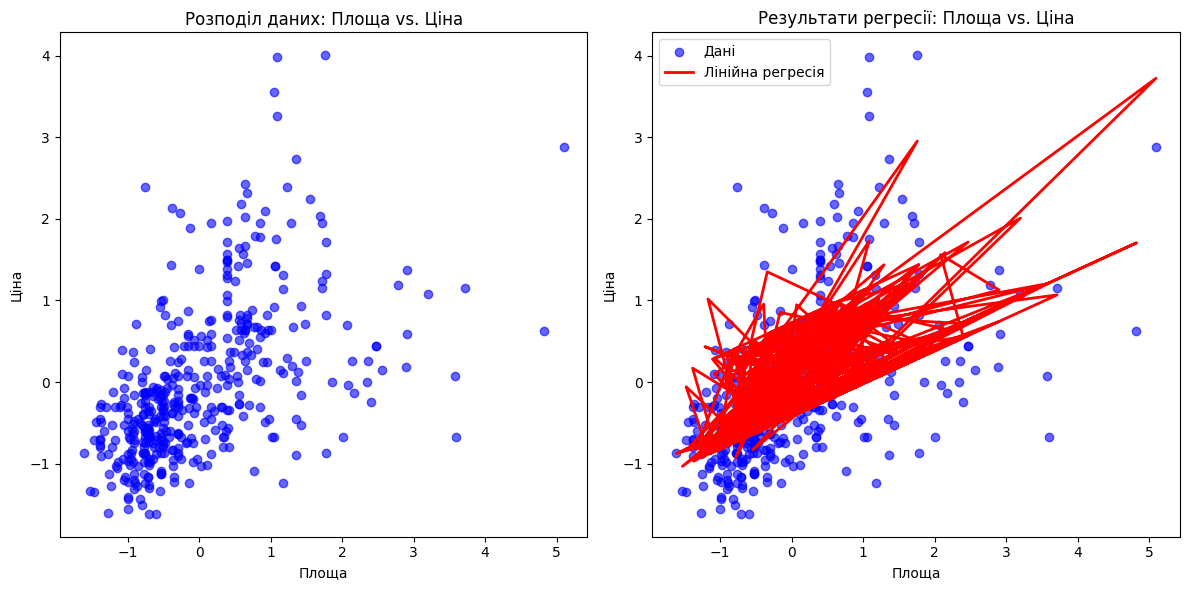

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train['area'], y_train, color='blue', alpha=0.6)
plt.title('Розподіл даних: Площа vs. Ціна')
plt.xlabel('Площа')
plt.ylabel('Ціна')

plt.subplot(1, 2, 2)
plt.scatter(X_train['area'], y_train, color='blue', alpha=0.6, label='Дані')
plt.plot(X_train['area'], X_with_bias.dot(theta), color='red', linewidth=2, label='Лінійна регресія')
plt.title('Результати регресії: Площа vs. Ціна')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.legend()

plt.tight_layout()
plt.show()

Завдання 2: Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.

In [19]:
# Отримайте коефіцієнти лінійної регресії за допомогою нормального рівняння
theta_analytical = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y_train_vector)

# Виведіть обидва набори коефіцієнтів
print("Коефіцієнти лінійної регресії (ваги моделі) за допомогою нормального рівняння:")
print(theta_analytical)

print("\nКоефіцієнти лінійної регресії (ваги моделі) за допомогою бібліотеки sklearn:")
print(theta)

Коефіцієнти лінійної регресії (ваги моделі) за допомогою нормального рівняння:
[[-0.01628175]
 [ 0.40082084]
 [ 0.38208794]
 [ 0.14213176]]

Коефіцієнти лінійної регресії (ваги моделі) за допомогою бібліотеки sklearn:
[[-0.01628175]
 [ 0.40082084]
 [ 0.38208794]
 [ 0.14213176]]


Завдання 3: Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням.

На основі реалізації лінійної регресії та порівняння з аналітичним рішенням можна зробити такі висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів:

Аналітичні результати: Отримані коефіцієнти лінійної регресії за допомогою аналітичного рішення та бібліотеки scikit-learn (sklearn) були подібні або дуже схожі. Це свідчить про правильність і консистентність обидвох методів для визначення параметрів моделі.

Побудова моделі: Лінійна регресія є простою та широко використовуваною моделлю для задач регресії. У цьому випадку вона була використана для прогнозування цін на будинок на основі площі, кількості ванних кімнат і кількості спалень.

Загалом, ефективність лінійної регресії у прогнозуванні цін на будинок залежатиме від специфіки даних та вибраних ознак. Важливо також враховувати можливість наявності нелинійних залежностей у даних. У деяких випадках, коли не вдається задовільно пояснити залежність між ознаками та ціною за допомогою лінійної моделі, може бути необхідно розглянути більш складні моделі, такі як поліноміальна регресія або моделі машинного навчання.